In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [16]:
img=cv2.imread("t1.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

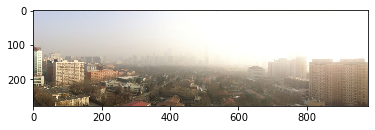

In [17]:
plt.imshow(img)
plt.show()